In [7]:
import pandas as pd
from scipy import stats
import numpy as np
import math
import matplotlib.pyplot as plt

In [8]:
data_merge = pd.read_csv("Data_Merge_withTemp.csv")
data_merge.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0_x,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,...,耳鼻喉医院,肿瘤医院,胸科医院,脑科医院,诊所,骨科医院,Unnamed: 0_y,Population,Land_Area_mi2,Temperature_03_12
0,0,0,0,35,四川省,Sichuan,51,凉山,Liangshan,NaN,...,55.0,53.0,12.0,13,11546,379,NaN,4680000,23266.960,271.80
1,1,1,1,104,新疆维吾尔自治区,Xinjiang,65,塔城,Tacheng,654201.0,...,4.0,5.0,5.0,5,2438,18,NaN,924000,40365.436,263.26
2,2,2,2,140,青海省,Qinghai,63,西宁,Xining,630100.0,...,7.0,7.0,2.0,3,1611,29,322.0,"1,539,000",2846.000,261.65
3,3,3,3,141,青海省,Qinghai,63,海北州,Haibei,632200.0,...,7.0,7.0,2.0,3,1611,29,NaN,284300,13278.000,255.14
4,4,4,4,142,西藏自治区,Xizang,54,拉萨,Lhasa,540100.0,...,NaN,NaN,NaN,3,369,2,NaN,902500,11303.000,263.28


In [9]:
# get useful columns
cols = ["cityEnglishName", "三级甲等医院", "专科医院", "传染病医院", "医疗保健服务场所", "卫生院", "口腔医院", "妇科医院", "急救中心", "整形美容", "疾病预防", "眼科医院", "精神病医院", "综合医院", "耳鼻喉医院", "肿瘤医院", "胸科医院", "脑科医院", "诊所", "骨科医院", "Population", "label"]
data_merge_new = pd.DataFrame(data_merge, columns = cols)
city_cc = data_merge['city_confirmedCount']
# move outliers
Q1 = city_cc.quantile(0.25)
Q3 = city_cc.quantile(0.75)
IQR = Q3 - Q1
outliers = []
cnt = 0
for item in city_cc:
    if item == True or item < (Q1 - 1.5 * IQR) or item > (Q3 + 1.5 * IQR) or item > 2000:
        outliers.append(cnt)
    cnt += 1
print(outliers)

cnt2 = 0
index = 0
for entry in data_merge_new.iterrows():
    if index == len(outliers):
        break
    if cnt2 == outliers[index]:
        data_merge_new = data_merge_new.drop([cnt2])
        city_cc = city_cc.drop([cnt2])
        index += 1
    cnt2 += 1
print(len(city_cc))
print(len(data_merge_new))
print(len(outliers))
print(len(data_merge_new) == len(data_merge) - len(outliers))

# print(IQ)
data_merge_new.head()


[4, 5, 19, 20, 26, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 83, 84, 85, 86, 89, 104, 116, 135, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 151, 168, 181, 182, 190, 226, 249, 260, 261, 278, 279, 283, 295, 333, 336, 351, 352, 376, 377, 417, 419, 421, 426, 446, 449, 451, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 485]
410
410
76
True


,cityEnglishName,三级甲等医院,专科医院,传染病医院,医疗保健服务场所,卫生院,口腔医院,妇科医院,急救中心,整形美容,...,精神病医院,综合医院,耳鼻喉医院,肿瘤医院,胸科医院,脑科医院,诊所,骨科医院,Population,label
0,Liangshan,541,17.0,43,11718,5013,2394,156,233,436,...,50.0,3605,55.0,53.0,12.0,13,11546,379,4680000,NaN
1,Tacheng,74,5.0,24,2568,684,507,42,35,54,...,3.0,942,4.0,5.0,5.0,5,2438,18,924000,NaN
2,Xining,114,12.0,14,1449,704,634,32,65,67,...,7.0,783,7.0,7.0,2.0,3,1611,29,"1,539,000",NaN
3,Haibei,114,12.0,14,1449,704,634,32,65,67,...,7.0,783,7.0,7.0,2.0,3,1611,29,284300,NaN
6,Qianxinan,150,14.0,22,5886,1377,783,114,139,86,...,11.0,1947,22.0,18.0,16.0,4,4634,80,2860000,NaN


In [10]:
num_of_labels = math.ceil((max(city_cc) - min(city_cc)) / city_cc.std())
print(num_of_labels)
# for l in data_merge_copy['label']:
#     if data_merge_copy['city_confirmedCount'] > 
# for entry in data_merge_new:
#     if data_merge['city_confirmedCount'] / 22
print(len(city_cc))
city_cc.std()

5
410


26.401378612737446

410


/Users/clara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


468
410


/Users/clara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


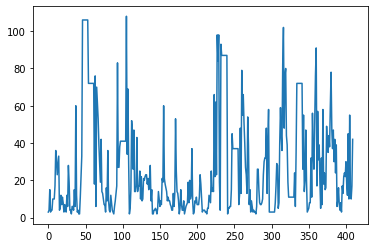

In [11]:
cnt = 0
data_merge_new_copy = data_merge_new.copy()
print(len(data_merge_new_copy['label']))

# print(len(data_merge_new_copy) == len(city_cc))
for l in city_cc:
    group = math.ceil(l / city_cc.std())
    data_merge_new_copy['label'][cnt] = group
    cnt += 1

city_cc_copy = list(city_cc)
plt.plot(np.arange(410), city_cc_copy)

# print(len(data_merge_new_copy))

print(len(data_merge_new_copy['label']))
print(len(data_merge_new_copy))

# print(len(data_merge_new_copy['label']))
# print(len(city_cc))
# print(data_merge_new_copy)
# print(len(data_merge_new_copy['label']))
# print(len(data_merge_new_copy))
# data has great difference in the few cities


# sb.relplot(x=0, y=1, kind='line', data=city_cc)
# city_cc.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

tmp = data_merge_new_copy['cityEnglishName']
cnt = 0
for data in tmp:

    tmp2 = data.split(" ")
    if len(tmp2) > 1:
# #         tmp3 = tmp2[0]
# #         tmp[i] = str(tmp3)
        tmp2 = tmp2[0]
    tmp[cnt] = tmp2
    cnt += 1
    

In [12]:
cols_new = cols.copy()
cols_new.pop()
features = cols_new
print(features)
# print(data_merge_new_copy['label'][1:100])
# for data in data_merge_new_copy['label']:
#     if data == None:
#         print(data)

['cityEnglishName', '三级甲等医院', '专科医院', '传染病医院', '医疗保健服务场所', '卫生院', '口腔医院', '妇科医院', '急救中心', '整形美容', '疾病预防', '眼科医院', '精神病医院', '综合医院', '耳鼻喉医院', '肿瘤医院', '胸科医院', '脑科医院', '诊所', '骨科医院', 'Population']


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

from sklearn.preprocessing import LabelEncoder


In [15]:
# clf.fit(X_train, Y_train)